<a href="https://colab.research.google.com/github/Arun9438/Boston-Housing-Pricing/blob/main/Audio_Classification_Phase_2_Exploring_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

In [4]:
# Give me the current working directory
os.getcwd()

'/content'

In [5]:
#navigate to another
os.chdir('/content/drive/MyDrive/Audio Binary Classification/cats_dogs')

In [6]:
os.getcwd()

'/content/drive/MyDrive/Audio Binary Classification/cats_dogs'

In [7]:
os.listdir()

['test', 'train']

In [8]:
os.path.exists('val')

False

In [9]:
os.mkdir('New_folder')

In [10]:
os.listdir()

['test', 'train', 'New_folder']

In [11]:
os.rmdir('New_folder')

In [12]:
os.listdir()

['test', 'train']

In [13]:
os.path.exists(os.path.join(os.getcwd()))

True

In [14]:
#Exercise to obtain different labels within my train folder
path = '/content/drive/MyDrive/Audio Binary Classification/cats_dogs/train'
os.chdir(path)
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
print(f'total labels: {len(labels)}')
labels

total labels: 2


['dog', 'cat']

In [15]:
import numpy as np


In [ ]:
pip install librosa

In [ ]:
import librosa
os.chdir('/content/drive/MyDrive/Audio Binary Classification/cats_dogs/train/cat')
#

In [ ]:
file_path = os.listdir()[0]

In [ ]:
#load the audio file
#y: the audio time series
#sr the sampling rate of y
y , sr = librosa.load(file_path, sr=None)

In [ ]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Tiime (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## **Spectrogram**

In [ ]:
D = np.abs(librosa.stft(y))
DB = librosa.amplitude_to_db(D , ref = np.max)

plt.figure(figsize=(14,5))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f db')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

## Mel Spectogram

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr ,n_mels=128)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f db')
plt.title('Mel Spectogram')
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torchaudio
from IPython.display import Image

In [ ]:
def plot_audio(filename):
  waveform,sample_rate = librosa.load(filename)
  # Convert librosa's numpy array output to torch tensor for consistency, if needed elsewhere
  waveform = torch.tensor(waveform).unsqueeze(0) # Add a channel dimension
  print("Shape of waveform:{}".format(waveform.size()))
  print("Sample rate of waveform:{}".format(sample_rate))
  plt.figure()
  plt.xlabel('Sample Index')
  plt.ylabel('Raw Amplitude')
  plt.plot(waveform[0])
  return waveform,sample_rate

In [ ]:
# Update package lists and install/reinstall FFmpeg
!apt-get update
!apt-get install -y ffmpeg

print("FFmpeg installation attempt complete. Please consider restarting the Colab runtime (Runtime -> Restart runtime...) then re-run the cells from 'import torch' onwards to apply changes.")

In [ ]:
!pip install torchcodec

In [ ]:
waveform, sample_rate = plot_audio(file_path)

In [ ]:
from pathlib import Path
import torchaudio # Keep torchaudio import if other parts of the notebook rely on it, but switch load method
import os
import librosa # Ensure librosa is imported for this function
import torch # Ensure torch is imported for tensor conversion

def load_audio_files(root_path: str):
  dataset=[]
  walker = sorted(Path(root_path).rglob("*.wav"))
  for file_path in walker:
    path, filename = os.path.split(file_path)
    label = os.path.basename(path)
    speaker,_ = os.path.splitext(filename)
    speaker_id = speaker
    utterance_number = 0
    # Use librosa.load and convert to torch.Tensor
    waveform_np, sample_rate = librosa.load(str(file_path), sr=None) # sr=None to keep original sample rate
    waveform = torch.tensor(waveform_np).unsqueeze(0) # Convert to torch tensor and add channel dimension
    dataset.append([waveform, sample_rate, label, speaker_id, utterance_number])
  return dataset

In [ ]:
dog_file_path = ('/content/drive/MyDrive/Audio Binary Classification/cats_dogs/train/dog')
cat_file_path = ('/content/drive/MyDrive/Audio Binary Classification/cats_dogs/train/cat')
#

In [31]:
train_dataset = load_audio_files("/content/drive/MyDrive/Audio Binary Classification/cats_dogs/train")

In [32]:
train_dog = [sample for sample in train_dataset if sample[2] == 'dog']
train_cat = [sample for sample in train_dataset if sample[2] == 'cat']

In [33]:
len(train_dog)

85

In [34]:
len(train_cat)

125

In [35]:
trainloader_dog = torch.utils.data.DataLoader(train_dog, batch_size=32, shuffle=True, num_workers=0)
trainloader_cat = torch.utils.data.DataLoader(train_cat, batch_size=32, shuffle=True, num_workers=0)

In [36]:
def show_waveform(waveform, sample_rate, label):
    new_sample_rate = sample_rate
    # Pass the waveform directly to Resample, as it's already (1, num_samples)
    new_waveform = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform)
    plt.figure()
    # Plot the transformed waveform (taking the first channel)
    plt.plot(new_waveform[0,:].numpy())

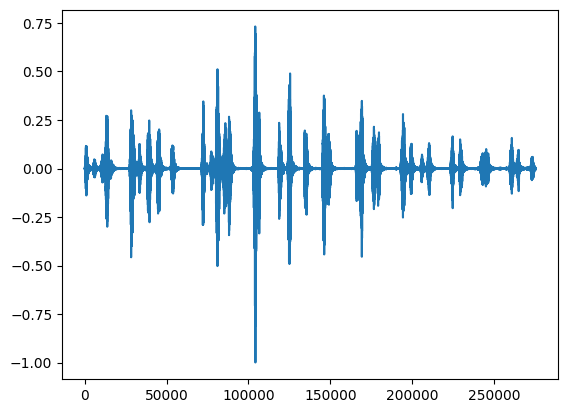

In [37]:
# Extract the first dog audio sample from the training dataset
dog_waveform = train_dog[0][0]
dog_sample_rate = train_dog[0][1]
show_waveform(dog_waveform, dog_sample_rate, 'dog')


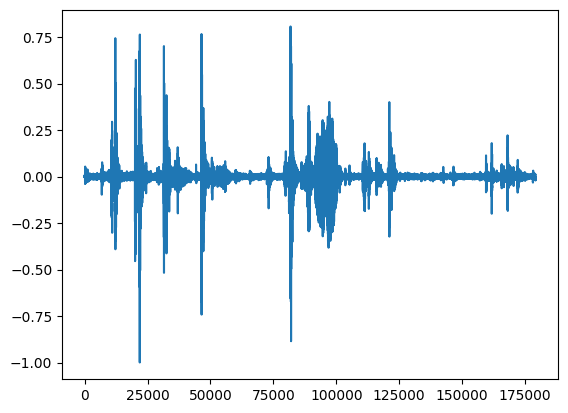

In [38]:
cat_waveform = train_cat[0][0]
cat_sample_rate = train_cat[0][1]
show_waveform(cat_waveform, cat_sample_rate, 'cat')

In [39]:
def show_spectrogram(waveform_classA, waveform_classB):
  dog_spectogram = torchaudio.transforms.Spectrogram()(waveform_classA)
  cat_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classB)
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  plt.title("Dog Spectrogram")
  plt.imshow(dog_spectogram[0,:,:].numpy(), cmap='viridis',aspect='auto') # Changed cmap to 'viridis'
  plt.xlabel('Time')
  plt.ylabel('Frequency')
  plt.subplot(1,2,2)

  plt.subplot(1,2,1)
  plt.title("Cat Spectrogram")
  plt.imshow(cat_spectrogram[0,:,:].numpy(), cmap='viridis',aspect='auto') # Changed cmap to 'viridis'
  plt.xlabel('Time')
  plt.ylabel('Frequency')
  plt.subplot(1,2,2)

  plt.tight_layout()
  plt.show()

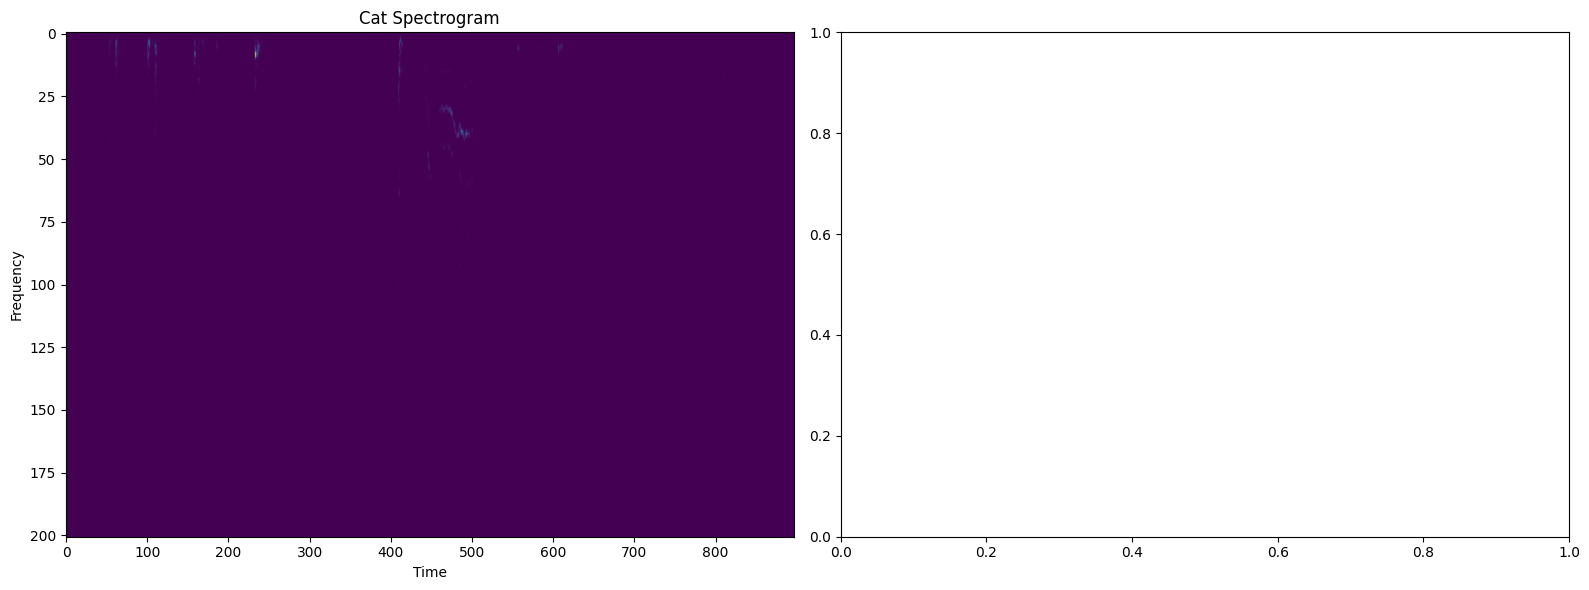

In [40]:
show_spectrogram(dog_waveform, cat_waveform)

In [41]:
def show_spectrogram(waveform, sample_rate):
  mel_spectogram = torchaudio.transforms.MelSpectrogram(sample_rate)(waveform)
  plt.figure(figsize=(16,6))

  plt.title("Mel Spectrogram")
  plt.imshow(mel_spectogram[0,:,:].numpy(), cmap='viridis',aspect='auto')
  plt.xlabel('Time')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.12/dist-packages/torchaudio/functional/functional.py:582: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


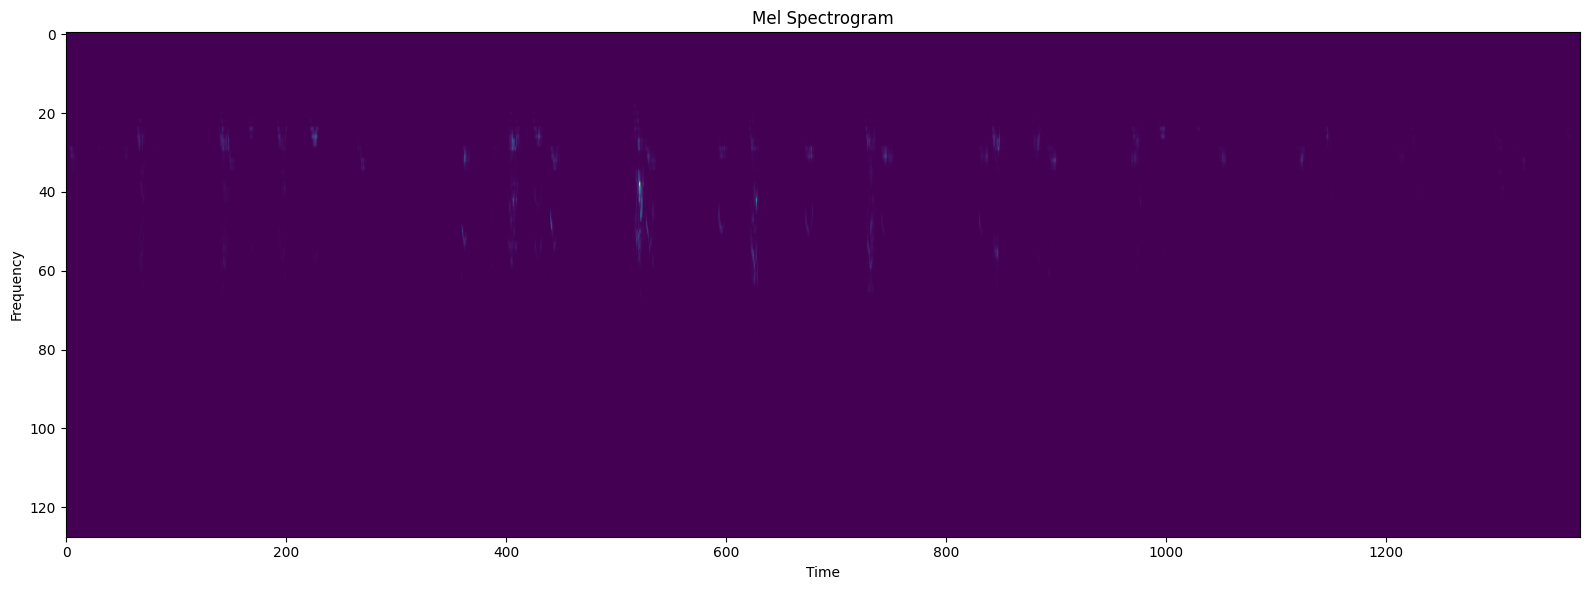

In [42]:
show_spectrogram(dog_waveform, dog_sample_rate)

In [43]:
def show_mfcc(waveform, sample_rate):
  mfcc_spectogram = torchaudio.transforms.MFCC(sample_rate=sample_rate)(waveform)

  plt.figure(figsize=(16,6))
  plt.title("MFCC")
  plt.imshow(mfcc_spectogram[0,:,:].numpy(), cmap='viridis',aspect='auto')
  plt.xlabel('Time')
  plt.ylabel('MFCC Coefficients')
  plt.tight_layout()
  plt.show()

  plt.title("cat Spectrogram")
  plt.imshow(mfcc_spectogram[0,:,:].numpy(), cmap='viridis',aspect='auto')
  plt.xlabel('Time')
  plt.ylabel('MFCC Coefficients')
  plt.tight_layout()


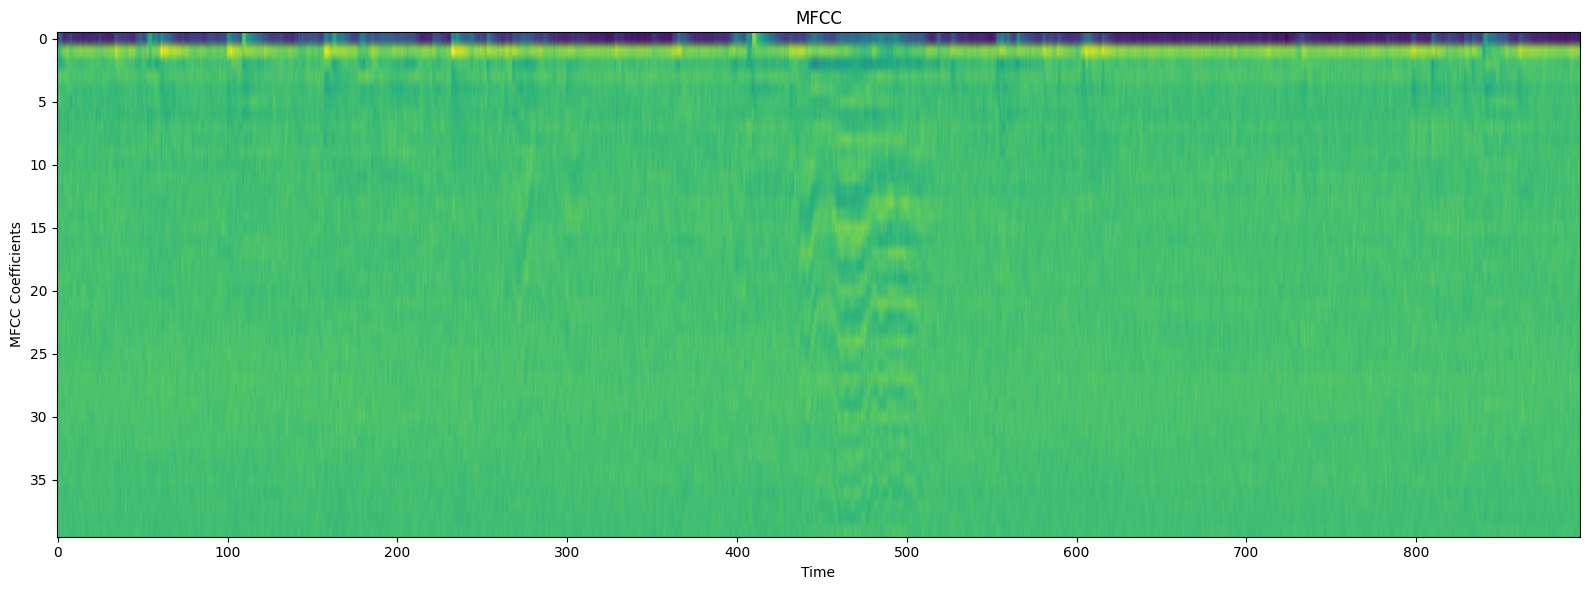

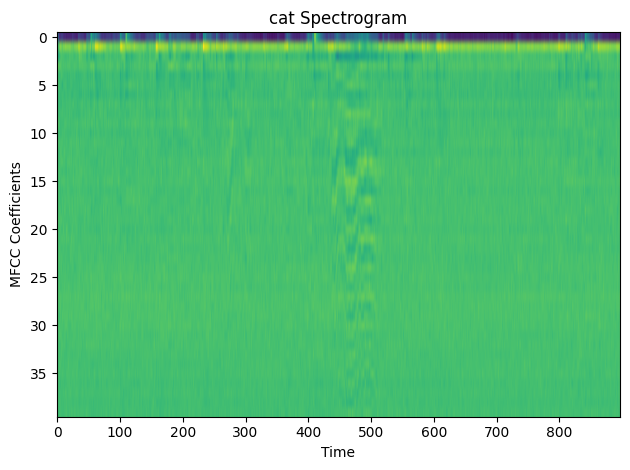

In [44]:
show_mfcc(cat_waveform, cat_sample_rate)